In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sequential import Linear, MSELoss, Sequential
import pandas as pd

df = pd.read_csv('./data/housing.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [5]:
df.dropna()
df['ocean_proximity'] = df['ocean_proximity'].map({'NEAR BAY': 1, '<1H OCEAN': 2, 'INLAND': 3, 'NEAR OCEAN': 4, 'ISLAND': 5})


In [6]:
df.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2653,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0,4
13431,-117.42,34.10,18.0,3977.0,809.0,2231.0,742.0,4.1399,115400.0,3
13018,-121.20,38.69,26.0,3077.0,607.0,1603.0,595.0,2.7174,137500.0,3
1635,-122.20,37.88,36.0,1065.0,160.0,398.0,155.0,7.7736,378100.0,1
1137,-121.66,39.66,17.0,3502.0,655.0,1763.0,613.0,2.9625,101200.0,3
1364,-122.14,38.03,42.0,118.0,34.0,54.0,30.0,2.5795,225000.0,1
11412,-117.95,33.69,24.0,4269.0,618.0,1954.0,597.0,6.9261,284600.0,2
5023,-118.34,33.99,48.0,2009.0,335.0,919.0,297.0,4.8125,170500.0,2
400,-122.28,37.88,52.0,1844.0,332.0,769.0,334.0,4.2614,261300.0,1
1582,-122.00,37.86,18.0,8953.0,1074.0,3011.0,993.0,10.7372,500001.0,2


In [7]:
df = df.dropna()

In [8]:
for column in df.columns:
    if (df[column].isnull().sum() > 0):
        print(column)
    else:
        print(column, "not null")

longitude not null
latitude not null
housing_median_age not null
total_rooms not null
total_bedrooms not null
population not null
households not null
median_income not null
median_house_value not null
ocean_proximity not null


['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']


<Figure size 1800x1200 with 0 Axes>

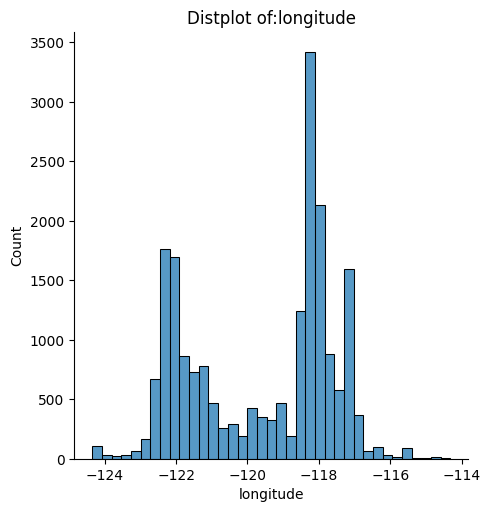

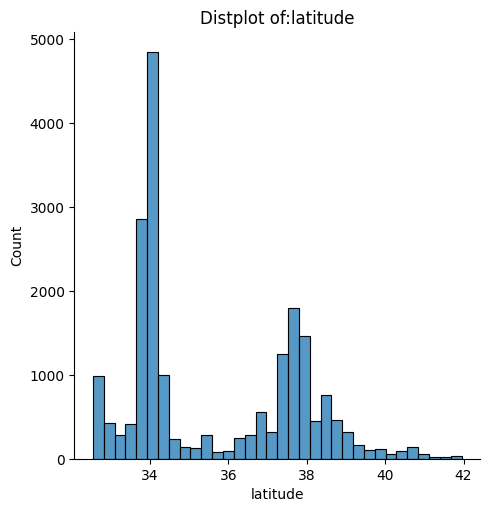

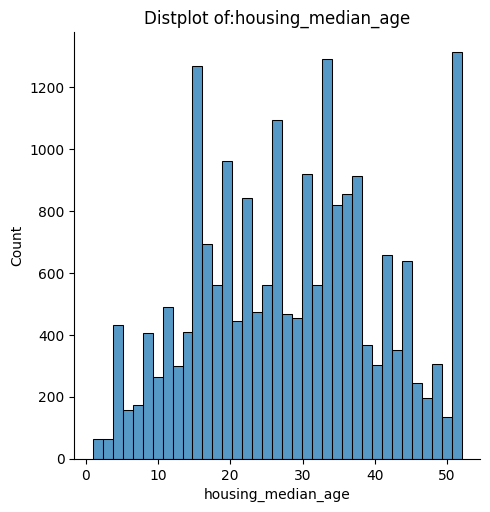

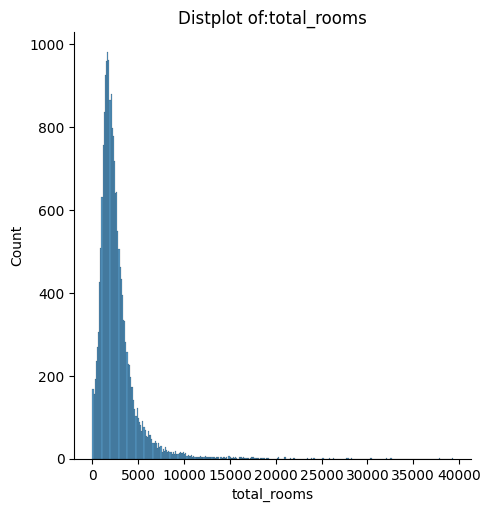

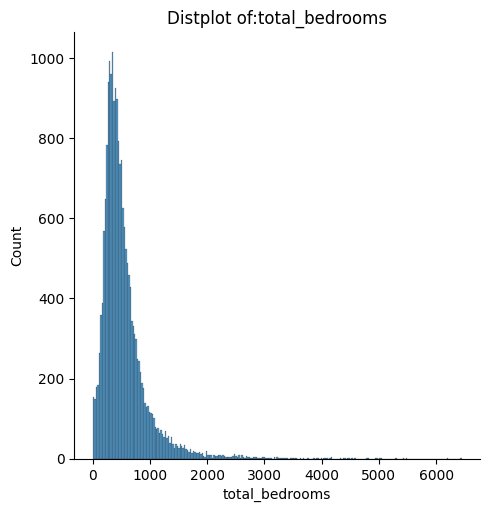

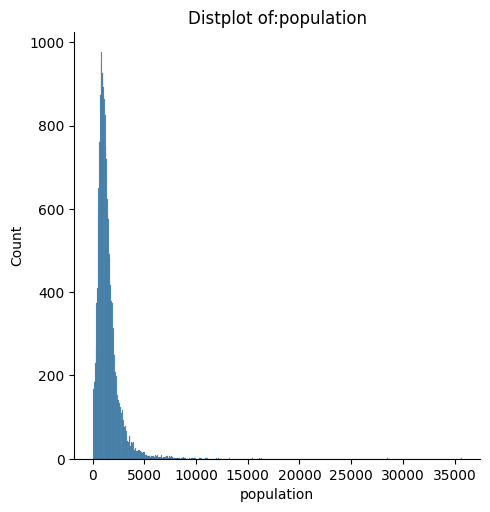

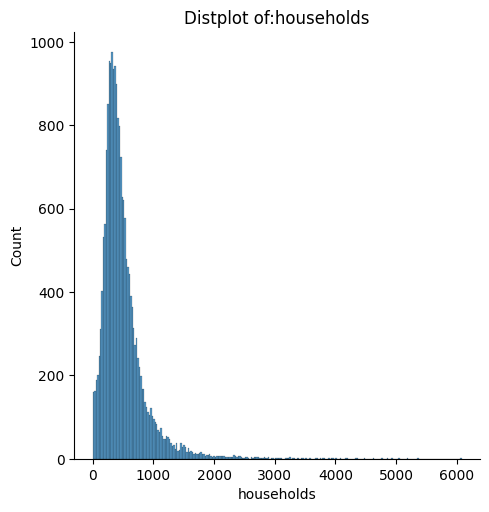

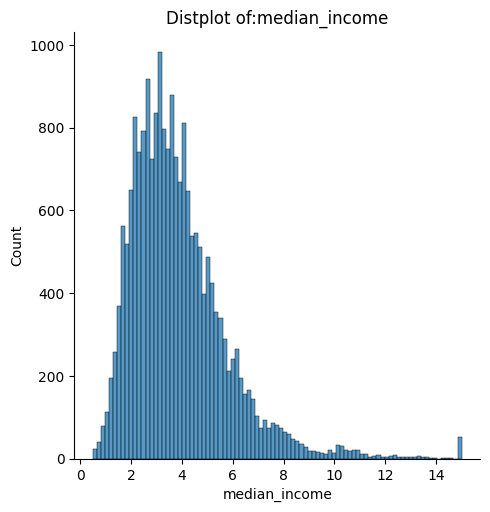

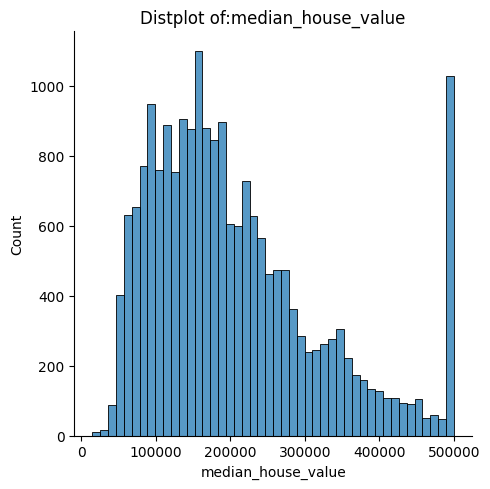

In [11]:
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

columns = df.columns
plt.figure(figsize=(18, 12))

columns = list(columns)
columns.pop()
print(columns)
for i, column in enumerate(columns):
    sns.displot(df[column])
    plt.title(f'Distplot of:{column}')

plt.tight_layout()
plt.show()

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']


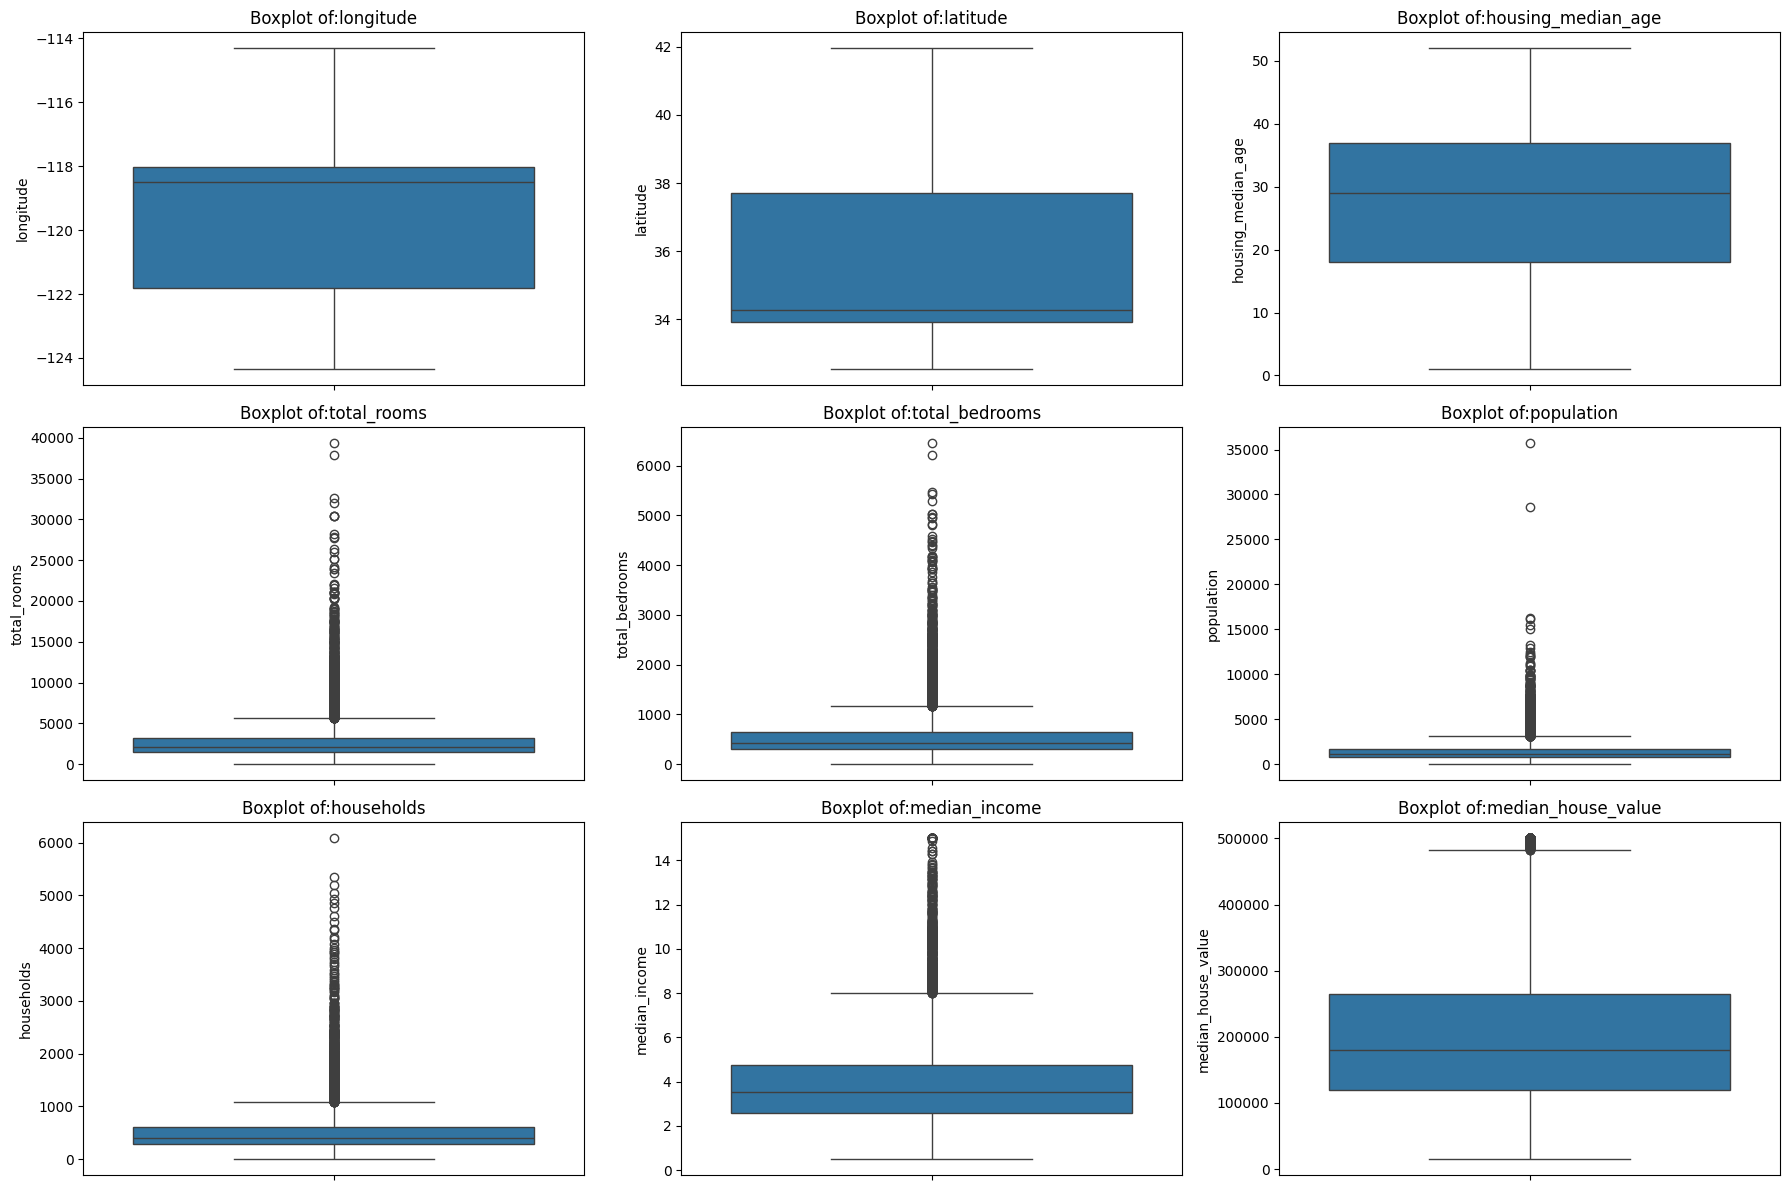

In [37]:
columns = df.columns
plt.figure(figsize=(18, 12))

columns = list(columns)
columns.pop()
print(columns)
for i, column in enumerate(columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(df[column])
    plt.title(f'Boxplot of:{column}')

plt.tight_layout()
plt.show()

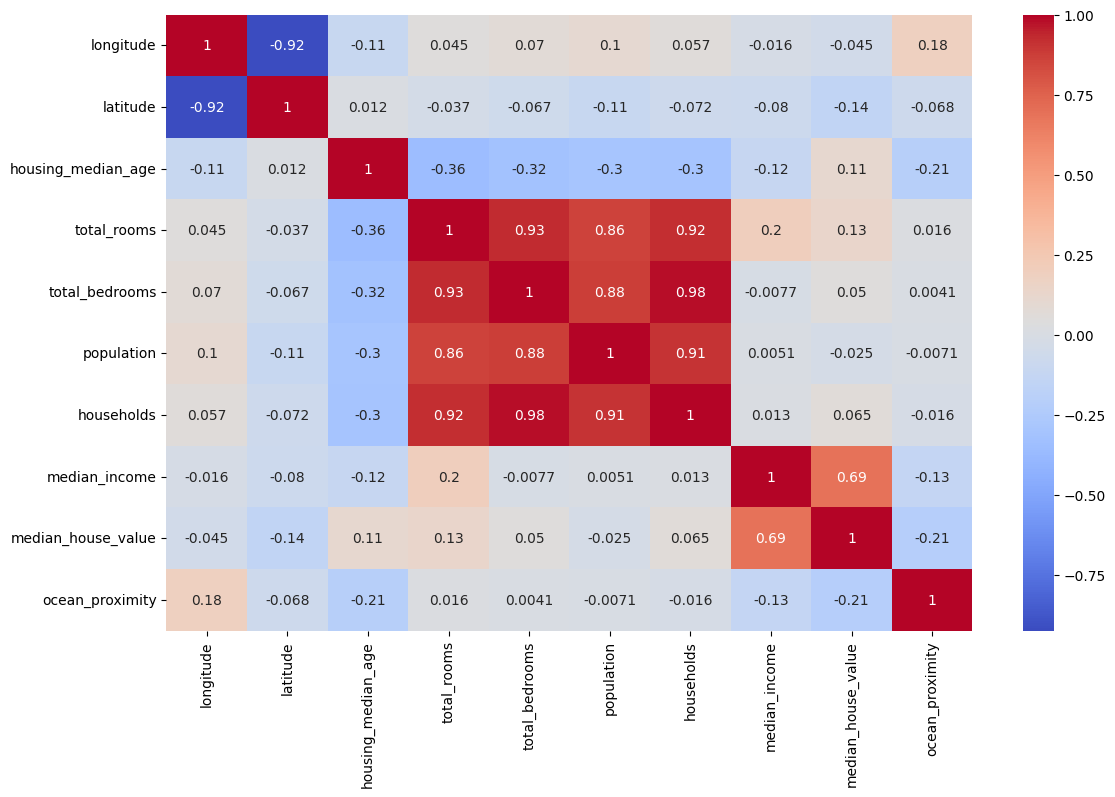

In [41]:
plt.figure(figsize=(13, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

<Axes: ylabel='count'>

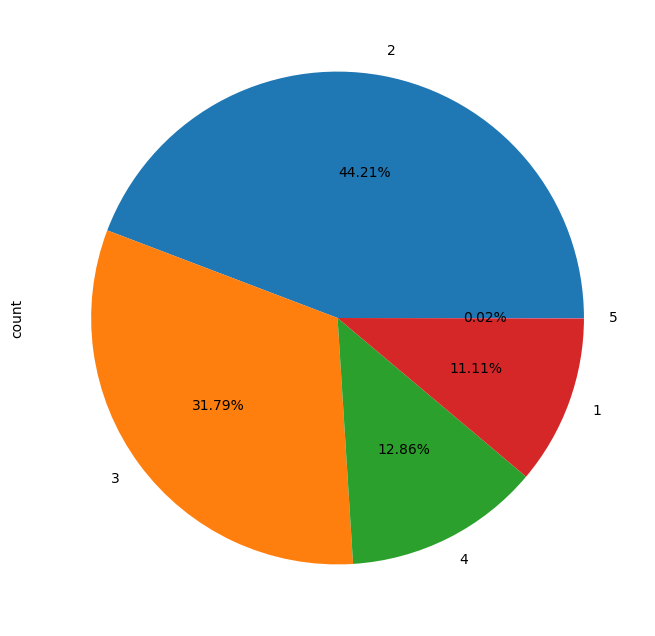

In [45]:
value_counts = df['ocean_proximity'].value_counts()
value_counts.plot(kind='pie', autopct='%.2f%%', figsize=(8, 8))